In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [2]:
X, Y = varied = make_blobs(n_samples=200,
                             cluster_std=[0.8, 0.7, 0.66],
                             random_state=170)
data = pd.DataFrame({
    'Feature_1': pd.DataFrame(X)[0],
    'Feature_2': pd.DataFrame(X)[1],
    'Label': Y
})
data.head()
# data.to_csv('dataset.csv', mode='w', index=False)

,Feature_1,Feature_2,Label
0,-8.876622,-5.617302,0
1,-4.328830,0.372171,1
2,-4.776086,-0.520391,1
3,1.244147,1.151716,2
4,3.405666,-0.017900,2


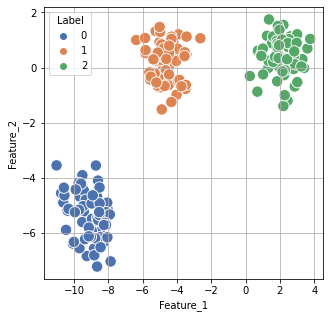

In [3]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=data, x='Feature_1', y='Feature_2', hue='Label', palette="deep", s=130)
plt.grid(True)
plt.show()

In [4]:
def kernel_function(X, X_i, h):
    power = np.sqrt(np.square(X-X_i).sum())
    den = 2*h*h
    return np.square((0.399/h))*np.exp(-(power/den))

In [5]:
def gradient_ascent(new_feature, h):
    for i in range(10):
        new_values = [0, 0]
        sum_k = 0
        for j in range(data.shape[0]):
            k = kernel_function(new_feature, data.iloc[j][['Feature_1','Feature_2']].values, h)
            sum_k += k
            new_values += data.iloc[j][['Feature_1','Feature_2']].values*k
        new_feature = new_values/sum_k
    return np.round(new_feature,2)

In [6]:
def Denclue(data, h, t):
    data['height'] = 0.000
    data['new_F1'] = 0.000
    data['new_F2'] = 0.000
    no = 20
    for i in range(data.shape[0]):
        if no==i+1:
            print('*', end="")
            no+=20
        feat_1 = 0
        new_Feature = [0, 0]
        for j in range(data.shape[0]):
            k = kernel_function(data.iloc[i][['Feature_1','Feature_2']].values, data.iloc[j][['Feature_1','Feature_2']].values, h)
            feat_1 += k
            new_Feature += data.iloc[j][['Feature_1','Feature_2']].values*k
        data['height'][i] = (feat_1/len(data)-t)
        new_Feature /= feat_1
        if data['height'][i]<0:
            data['height'][i] = 0
        else:
            g = gradient_ascent(new_Feature, h)
            data['new_F1'][i] = g[0]
            data['new_F2'][i] = g[1]
    centers= pd.DataFrame({
        'F1_center': data[data['new_F1']!=0]['new_F1'].unique(),
        'F2_center': data[data['new_F2']!=0]['new_F2'].unique(),
        'Cluster': np.arange(1, len(data[data['new_F1']!=0]['new_F1'].unique())+1)
    })
    print('\n\nCluster Centers')
    print(centers)
    data['Cluster'] = -1
    for i in range(data.shape[0]):
        for j in range(centers.shape[0]):
            if data.iloc[i]['new_F1'] == centers.iloc[j]['F1_center'] and data.iloc[i]['new_F2'] == centers.iloc[j]['F2_center']:
                data['Cluster'][i] = centers.iloc[j]['Cluster']
                break
    print('\nNo of Datapoints in Each Cluster')
    print(data.groupby('Cluster')['Cluster'].count())

In [7]:
h = float(input('Enter Value of h: '))
t = float(input('Enter Value of t: '))
Denclue(data, h, t)

Enter Value of h:  0.8
Enter Value of t:  0.025


**********

Cluster Centers
   F1_center  F2_center  Cluster
0      -8.94      -5.43        1
1      -4.59       0.14        2
2       2.00       0.49        3

No of Datapoints in Each Cluster
Cluster
-1    18
 1    57
 2    64
 3    61
Name: Cluster, dtype: int64


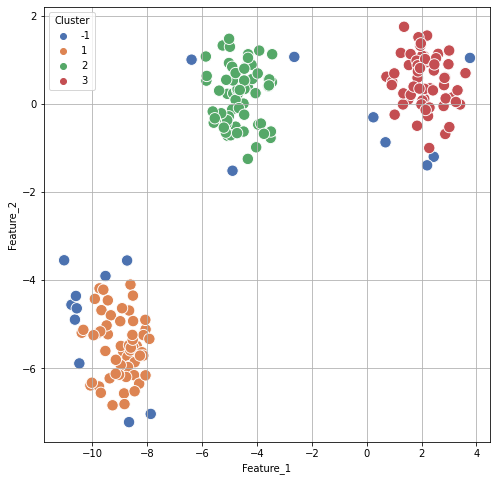

In [8]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=data, x='Feature_1', y='Feature_2', hue='Cluster', palette="deep", s=130)
plt.grid(True)
plt.show()

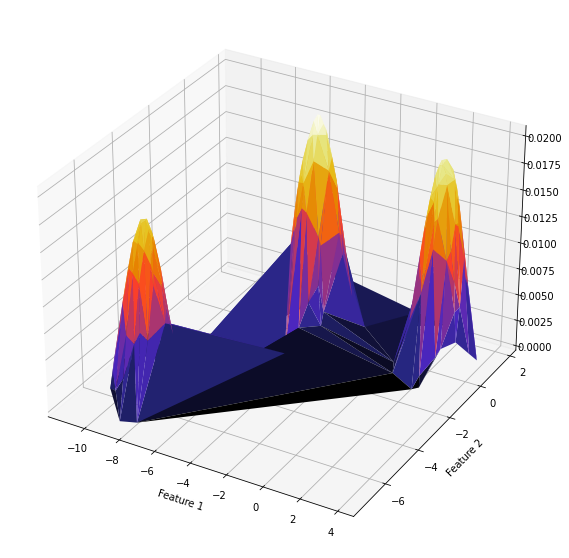

In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
x = data['Feature_1']
y = data['Feature_2']
z = data['height']
  
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')
  
ax.plot_trisurf(x, y, z, color="red",
                linewidth = 0,
                antialiased = True , cmap=plt.cm.CMRmap);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# ax.view_init(0, -90)
plt.show()